In [87]:
# Nome: Larissa de Oliveira Penteado
# NUSP: 8941338
from vpi.io import *
import numpy as np

# Exercícios

<p> <strong>1. </strong> Encontre a profundidade das imagens localizadas em "images/depth-1.tif", "images/depth-2.tif", "images/depth-3.tif", justificando sua resposta com código python.</p>

In [88]:
# Entre com seu código aqui
f = read_image("images/depth-1.tif")
g = read_image("images/depth-2.tif")
h = read_image("images/depth-3.tif")
#o tipo da variável nos mostra com quantos bits ela é representada na memória
# deste modo, basta descobrirmos o tipo dela a partir da função dtype do numpy
# logo, se for uintx significa que possui x bits, e 2 ^ x níveis de cinza
df = f.dtype
dg = g.dtype
dh = h.dtype
print("Tipo de dados de depth-1.tif = ", df)
print("Tipo de dados de depth-2.tif = ", dg)
print("Tipo de dados de depth-3.tif = ", dh)


Tipo de dados de depth-1.tif =  uint8
Tipo de dados de depth-2.tif =  uint32
Tipo de dados de depth-3.tif =  uint16


<p><strong>Resp.:</strong><p> Profundidade da primeira imagem = 8 bits, 256 níveis de cinza.</p>
<p> Profundidade da segunda imagem = 32 bits, 4294967296 níveis de cinza. </p>
<p> Profundidade da terceira imagem = 16 bits, 65536 níveis de cinza. </p> </p>


<p> <strong>2. </strong> Encontre a resolução espacial das imagens "images/resolution-1.tif", "images/resolution-2.tif" e "images/resolution-3.tif". Justifique sua resposta com código em Python. </p>

In [89]:
# Entre com seu código aqui
l = read_image("images/resolution-1.tif")
Hl, Wl = l.shape
print("Resolução de f = ", Hl, "x", Wl)
k = read_image("images/resolution-2.tif")
Hk, Wk = k.shape
print("Resolução de g = ", Hk, "x", Wk)
j = read_image("images/resolution-3.tif")
Hj, Wj = j.shape
print("Resolução de h = ", Hj, "x", Wj)

Resolução de f =  128 x 128
Resolução de g =  64 x 64
Resolução de h =  256 x 256


<p> <strong> Resp.: </strong> Resolução espacial da primeira, segunda e terceira imagens, respectivamente: 128x128 pixels, 64x64 pixels, 256x256 pixels. </p>


<p> 
    <strong> 3.</strong> A classe ImageInfo armazena dados da imagem como histograma, média e desvio padrão. Na 
    implementação de seu construtor, implemente os métodos _calc_histogram que calcula o histograma e o armazena em um 
    array de inteiros, _calc_mean que calcula a média e a armazena em número real (float), _cal_standard_deviation que 
    calcula o desvio padrãoe o armazena em número real (float). 
</p>

In [90]:
class ImageInfo:
    def __init__(self, image):
        image_size = image.size
        self.histogram = self._calc_histogram(image)
        self.mean = self._calc_mean(self.histogram, image_size)
        self.std_dev = self._calc_standard_deviation(self.histogram, self.mean, image_size)
        
    def _calc_histogram(self, image):
        # Entre com seu código aqui
        histogram = np.zeros(256).astype(int) 
        H, W = image.shape
        for i in range(H):
            for j in range(W):
                histogram[image[i,j]] = histogram[image[i,j]] + 1
        return histogram
        
    
    def _calc_mean(self, hist, image_size):
        # Entre com seu código aqui
        mean_i = 0
        for i in range(256):
            mean_i = mean_i + i*hist[i]
        mean_i = float(mean_i/image_size)
        return mean_i
    
    def _calc_standard_deviation(self, hist, mean, image_size):
        # Entre com seu código aqui
        sd = 0
        for i in range(256):
            sd = sd + hist[i]*(i-mean)**2

        sd = float(sd /(image_size-1))
        sd = math.sqrt(sd)
        return sd
        

<p> <strong>4. </strong>Usando um ndarray crie uma imagem com dimensão 256x256 pixels, 8-bits de profundidade, desvio padrão aproximadamente 127.5 e média 127.5.</p>

Média: 127.5
Desvio padrão: 127.50097275893509


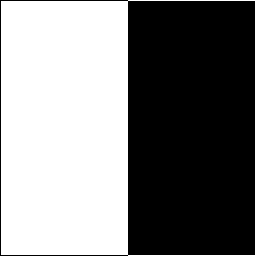

In [91]:
# Entre com seu código aqui
f = np.zeros((256,256)).astype(int)
f[1:255, 1:128] = 255
f[0, 128:256] = 255
f[0:255, 255] = 255
f[255, 128:256] = 255
info = ImageInfo(f)
print ("Média:", info.mean)
print ("Desvio padrão:", info.std_dev)
display_image(f)


<p> 
    <strong>5. </strong> Implemente função de transição de escalas de intensidades linear homogênia (se a função resultar um valor 
    maior que 255, ele deve ser mapeado a 255, se a função resultar um valor menor que 0, então ele deve ser mapeado ao valor 0 e 
    o valor dever ser sempre um valor inteiro obtido pela operação chão). 
    Condifique essa função em Python implementando a função 'linear' abaixo. Note que ela recebe uma constante real (float) 'k' e 
    uma imagem 'img' de profundidade 8-bits e devolve a aplicação da função na imagem.   
</p>

In [92]:
def linear(img, k):
    # Entre com seu código aqui
    T1 = np.arange(256).astype('uint8')
    T2 = k*T1
    T2 = np.clip(T2, 0, 255)
    img = np.floor(T2[img])
    return img


<p> 
    <strong>6. </strong>  Implemente a função 'show_transform_linear_filtered_image' que exibe a imagem filtrada pela função 
    'linear' implementada no <strong>exercício 5</strong> e com valor constante 'k' recebida pela função <strong>interact</strong>, assim como o 
    histograma da imagem com intensidades transformada. E responda qual a relação do valor dos atributos contraste e brilho com a 
    constante 'k'.
</p>

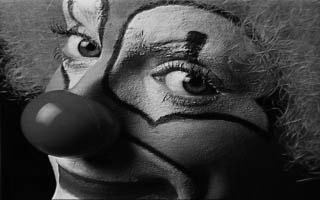

In [155]:
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
import matplotlib
%matplotlib inline 

def show_transform_linear_filtered_image(k):
    # Entre com seu código aqui 
    f = read_image("images/clown.tif")
    img_t = linear (f,k)
    display_image(img_t)
interact(show_transform_linear_filtered_image, k=(0.0,2.0), step=0.05)

<p> <strong>Resp.: </strong> Conforme o K aumenta, o brilho aumenta e o constraste também. Por outro lado, quando k diminui
 o brilho e o contraste diminuem</p>


<p>
    <strong>7.</strong> Escreva a função de transição de intensidade de equilização de histograma visto em aula (onde smax = a 
    intensidade maxíma da imagem) para uma imagem de profundidade 8-bits, implementando as funções 'calc_rel_hist' que calcula o histograma relativo, 'calc_acc_rel_hist' que calcula o histograma relativo acumulado e 'calc_equalize_transformation' que calcula a imagem transformada pela equalização de histograma. 
</p>

In [153]:
def calc_rel_hist(info, f):    
    # Entre com seu código aqui
    rela_hist = np.zeros(256).astype(float)
    for i in range(256):
        rela_hist[i] = float(info.histogram[i]/f.size)
    return rela_hist

def calc_acc_rel_hist(freq):
    # Entre com seu código aqui
    ar_hist = np.zeros(256).astype(float)
    ar_hist[0] = freq[0]
    for i in range(1,256):
        ar_hist[i] = ar_hist[i-1] + freq[i]
    return ar_hist
    

def calc_equalize_transformation(acc_rel_hist, max_grayscale = 255):
    # Entre com seu código aqui
    T =  np.floor(acc_rel_hist*max_grayscale).astype(int)
    return T
    
def equalize(f):
    info = ImageInfo(f)
    rel_hist = calc_rel_hist(info, f)
    acc_rel_hist = calc_acc_rel_hist(rel_hist)
    T = calc_equalize_transformation(acc_rel_hist)
    return T[f]

<p> 
    <strong>8. </strong> As imagens 'images/hidden_message-1.tif' e 'images/hidden_message-2.tif' possuem 
    mensagens escondidas. Utilize o conteúdo apresentado na disciplina e encontre as mensagens escondidas.  
</p>

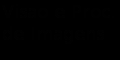

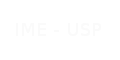

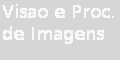

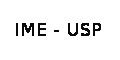

In [154]:
hidden_message1 = read_image('images/hidden_message-1.tif')
hidden_message2 = read_image('images/hidden_message-2.tif')
display_image(hidden_message1)
display_image(hidden_message2)
# Entre com seu código aqui
not_hidden_anymore1 = equalize(hidden_message1)
display_image(not_hidden_anymore1)
not_hidden_anymore2 = equalize(hidden_message2)
display_image(not_hidden_anymore2)


<p> <strong>Resp.: </strong> <p> Visao e Proc. de Imagens</p>
<p> IME - USP</p> </p>
